In [1]:
%matplotlib inline

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

## Data Cleaning and Merge

In [62]:
df = pd.read_csv('Datasets/games_details.csv', low_memory=False)
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [72]:
seasons = pd.read_csv('Datasets/games.csv', low_memory=False)[["GAME_ID","SEASON"]]

In [5]:
df = df.groupby(["GAME_ID","TEAM_ID"]).sum()
df = df.reset_index()
df = df.drop(['PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT','PLUS_MINUS'],axis=1)

In [6]:
df["FG_PCT"] = df["FGM"]/df["FGA"]*100
df["FG3_PCT"] = df["FG3M"]/df["FG3A"]*100
df["FT_PCT"] = df["FTM"]/df["FTA"]*100

In [7]:
df

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,38.0,20.0,9.0,4.0,18.0,34.0,85.0,44.736842,25.000000,50.000000
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,41.0,23.0,8.0,4.0,18.0,26.0,90.0,45.714286,14.285714,73.529412
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,43.0,20.0,9.0,4.0,24.0,26.0,94.0,42.666667,15.384615,70.000000
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,48.0,25.0,18.0,7.0,25.0,35.0,105.0,49.382716,26.666667,61.764706
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,52.0,25.0,10.0,7.0,25.0,33.0,100.0,49.350649,66.666667,68.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53042,52100131,1610612759,37.0,91.0,13.0,34.0,16.0,22.0,8.0,26.0,34.0,19.0,4.0,3.0,6.0,20.0,103.0,40.659341,38.235294,72.727273
53043,52100201,1610612737,39.0,80.0,9.0,31.0,20.0,22.0,10.0,32.0,42.0,15.0,5.0,3.0,13.0,19.0,107.0,48.750000,29.032258,90.909091
53044,52100201,1610612739,37.0,81.0,13.0,36.0,14.0,17.0,8.0,28.0,36.0,23.0,8.0,4.0,11.0,20.0,101.0,45.679012,36.111111,82.352941
53045,52100211,1610612740,43.0,88.0,6.0,22.0,13.0,25.0,17.0,37.0,54.0,20.0,2.0,3.0,8.0,26.0,105.0,48.863636,27.272727,52.000000


In [8]:
new_df = pd.merge(df,seasons,how="left", on="GAME_ID")
new_df

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,AST,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT,SEASON
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,...,20.0,9.0,4.0,18.0,34.0,85.0,44.736842,25.000000,50.000000,2003
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,...,23.0,8.0,4.0,18.0,26.0,90.0,45.714286,14.285714,73.529412,2003
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,...,20.0,9.0,4.0,24.0,26.0,94.0,42.666667,15.384615,70.000000,2003
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,...,25.0,18.0,7.0,25.0,35.0,105.0,49.382716,26.666667,61.764706,2003
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,...,25.0,10.0,7.0,25.0,33.0,100.0,49.350649,66.666667,68.965517,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53100,52100131,1610612759,37.0,91.0,13.0,34.0,16.0,22.0,8.0,26.0,...,19.0,4.0,3.0,6.0,20.0,103.0,40.659341,38.235294,72.727273,2021
53101,52100201,1610612737,39.0,80.0,9.0,31.0,20.0,22.0,10.0,32.0,...,15.0,5.0,3.0,13.0,19.0,107.0,48.750000,29.032258,90.909091,2021
53102,52100201,1610612739,37.0,81.0,13.0,36.0,14.0,17.0,8.0,28.0,...,23.0,8.0,4.0,11.0,20.0,101.0,45.679012,36.111111,82.352941,2021
53103,52100211,1610612740,43.0,88.0,6.0,22.0,13.0,25.0,17.0,37.0,...,20.0,2.0,3.0,8.0,26.0,105.0,48.863636,27.272727,52.000000,2021


## Part I

In [27]:
FG3A = new_df.groupby(["SEASON"])["FG3A"].sum()
FG3A = FG3A.reset_index()
# FG3A = FG3A.tolist()

In [46]:
# selecting data from 2011 to 2021
# https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79
final_FG3A = FG3A.iloc[8:19,:]

C:\Users\Bowen\AppData\Local\Temp\ipykernel_16100\4061967301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_FG3A['SEASON'] = final_FG3A['SEASON'].astype(str)


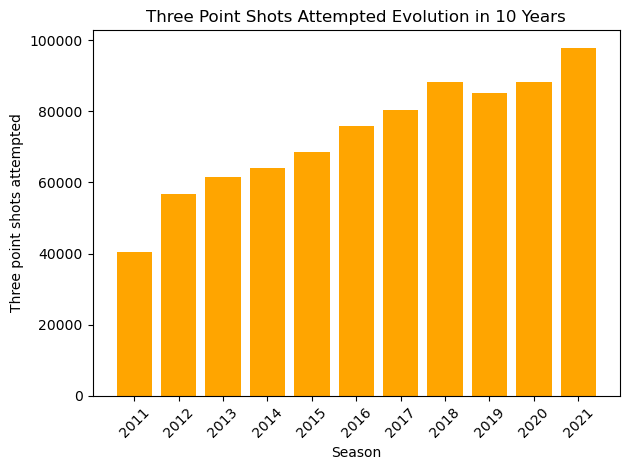

In [101]:
final_FG3A['SEASON'] = final_FG3A['SEASON'].astype(str)
plt.bar(final_FG3A["SEASON"],final_FG3A["FG3A"],color='orange', align="center")

plt.title("Three Point Shots Attempted Evolution in 10 Years")
plt.xlabel("Season")
plt.ylabel("Three point shots attempted")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("field_goal_3_attempted.png")
plt.show()


In [30]:
# compare how many 3-point in total field goal attempted, and how many 3-point made as well
line_df = new_df.groupby(["SEASON"])["FGA"].sum()
line_df  = line_df.reset_index()

In [31]:
# 3-point vs. field goal attempted %
FG3A_PCT = FG3A["FG3A"]/line_df["FGA"]*100

In [32]:
line_df_fg3m = new_df.groupby(["SEASON"])["FG3M"].sum()
line_df_fg3m  = line_df_fg3m.reset_index()

In [33]:
# 3-point made vs. field goal made, we want shooting percentage
FG3M_PCT = line_df_fg3m["FG3M"]/FG3A["FG3A"]*100

In [34]:
line_df['FG3A_PCT'] = FG3A_PCT
line_df['FG3M_PCT'] = FG3M_PCT

In [35]:
# selecting data from 2011 to 2021
line_df = line_df.iloc[8:19,:]

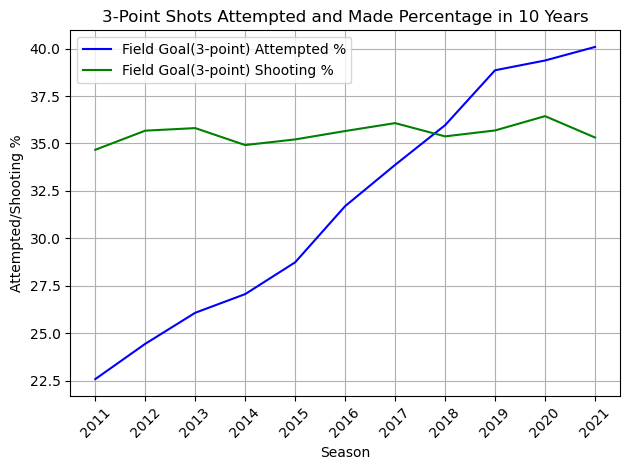

In [100]:
line_df['SEASON'] = line_df['SEASON'].astype(str)

# Plot the FG3A_PCT as a line chart
line1, = plt.plot(line_df["SEASON"], line_df["FG3A_PCT"], color="blue", label="Field Goal(3-point) Attempted %")

# Plot the FG3M_PCT as a second line chart
line2, = plt.plot(line_df["SEASON"], line_df["FG3M_PCT"], color="green",label="Field Goal(3-point) Shooting %")

# Create a legend for our chart
plt.legend(handles=[line1, line2], loc="best")

plt.title("3-Point Shots Attempted and Made Percentage in 10 Years")
plt.xlabel("Season")
plt.ylabel("Attempted/Shooting %")

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("field_goal_3_percentage.png")
plt.show()


## Part II

In [70]:
df1 = df.groupby(["TEAM_ABBREVIATION", "GAME_ID"]).sum()
df1 = df1.reset_index()
df1.columns

Index(['TEAM_ABBREVIATION', 'GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [71]:
df1 = df1.drop(['TEAM_ID','PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT','FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PLUS_MINUS'],axis=1)
df1.head()

,TEAM_ABBREVIATION,GAME_ID,FGM,FGA,FG3M,FG3A,PTS
0,ATL,10300011,28.0,80.0,3.0,7.0,80.0
1,ATL,10400070,29.0,72.0,1.0,9.0,82.0
2,ATL,10400073,26.0,78.0,4.0,15.0,72.0
3,ATL,10500003,30.0,70.0,1.0,5.0,93.0
4,ATL,10500015,38.0,78.0,4.0,6.0,109.0


In [75]:
corr_df = pd.merge(df1,seasons,how="left", on="GAME_ID")
corr_df = corr_df.set_index('TEAM_ABBREVIATION')
corr_df

,GAME_ID,FGM,FGA,FG3M,FG3A,PTS,SEASON
TEAM_ABBREVIATION,,,,,,,
ATL,10300011,28.0,80.0,3.0,7.0,80.0,2003
ATL,10400070,29.0,72.0,1.0,9.0,82.0,2004
ATL,10400073,26.0,78.0,4.0,15.0,72.0,2004
ATL,10500003,30.0,70.0,1.0,5.0,93.0,2005
ATL,10500015,38.0,78.0,4.0,6.0,109.0,2005
...,...,...,...,...,...,...,...
WAS,42000103,38.0,96.0,8.0,35.0,103.0,2020
WAS,42000104,40.0,88.0,9.0,24.0,122.0,2020
WAS,42000105,39.0,79.0,8.0,20.0,112.0,2020


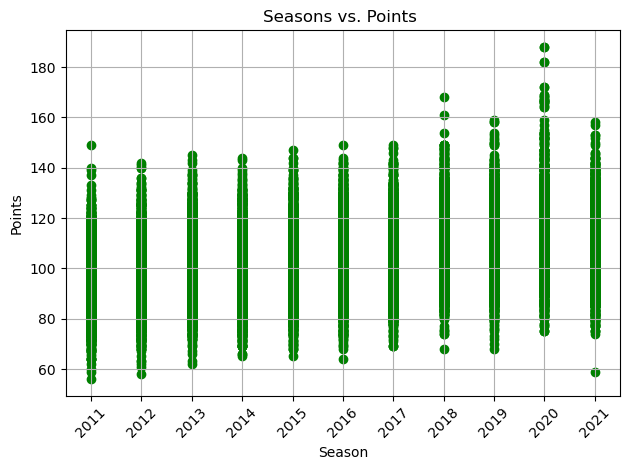

In [102]:
corr_df = corr_df[(corr_df['SEASON'] > '2010') &  (corr_df['SEASON']< '2022')]

corr_df['SEASON'] = corr_df['SEASON'].astype("str")
plt.scatter(corr_df['SEASON'], corr_df['PTS'], color = 'g')

plt.title("Seasons vs. Points ")
plt.xlabel("Season")
plt.ylabel("Points")

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.savefig("seasons_vs_points.png")
plt.show()

In [134]:
corr_df_1 = corr_df.groupby(["SEASON", "TEAM_ABBREVIATION"])["PTS"].mean()

In [135]:
corr_df_2 = corr_df.groupby(["SEASON", "TEAM_ABBREVIATION"])["FG3A"].mean()

The correlation between both factors is 0.82
The r-squared is: 0.68


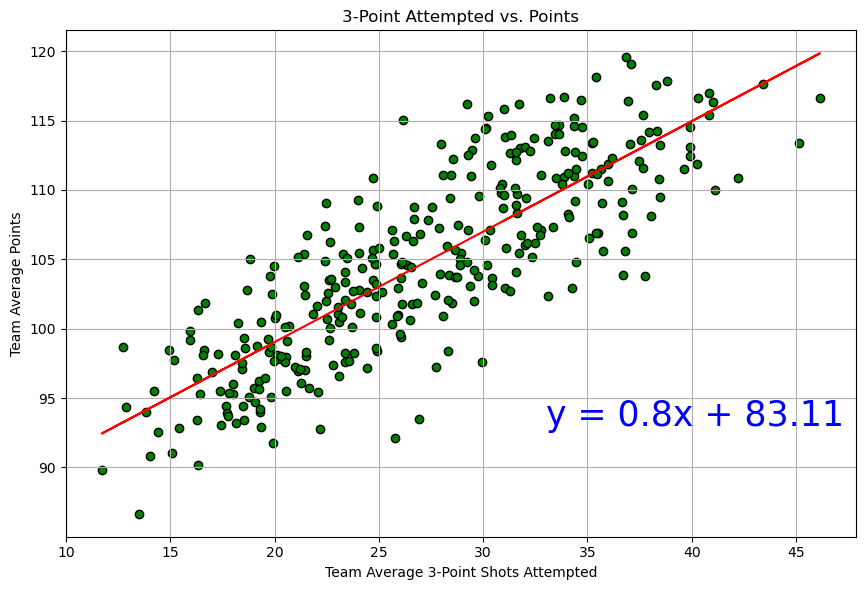

In [133]:
import scipy.stats as st
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(corr_df_2, corr_df_1)
regress_values = corr_df_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(corr_df_2, corr_df_1, color ='green',edgecolor="black")
plt.plot(corr_df_2,regress_values,"r-")
plt.annotate(line_eq,(33,93),fontsize=25,color="blue")

plt.title("3-Point Attempted vs. Points")
plt.xlabel("Team Average 3-Point Shots Attempted")
plt.ylabel("Team Average Points")

correlation = st.pearsonr(corr_df_2,corr_df_1)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# the bigger r-squared is, the better the fitted linear regression line
print(f"The r-squared is: {round(rvalue**2,2)}")

# plt.xticks(rotation=45)
plt.figure(figsize=(9,6))
plt.grid()
plt.tight_layout()
plt.savefig("3_point_attempted_vs_points.png")
plt.show()